In [190]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier
import seaborn as sns
import re

In [191]:
train_data = pd.read_csv('train.csv') # has rows 0 - 890
test_data_loading = pd.read_csv('test.csv') # has rows 892 - 1309
test_data_loading

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [192]:
data = pd.concat([train_data, test_data_loading], ignore_index=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [194]:
def preprocess(df):
    df = df.copy()
    
    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])
    
    def ticket_number(x):
        return x.split(" ")[-1]
        
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])
    
    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)                     
    return df
    
data = preprocess(data)

In [195]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0.0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1.0,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1.0,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1.0,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0.0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1046 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1308 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1307 non-null   object 
 12  Ticket_number  1309 non-null   object 
 13  Ticket_item    1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [197]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [198]:
data['Cabin'].fillna('Unknown', inplace=True)
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'U')
data['Room_Number'] = data['Cabin'].apply(lambda x: re.sub('[^0-9]', '', x) if isinstance(x, str) else -1)
data['Room_Number'] = pd.to_numeric(data['Room_Number'], errors='coerce')
data = data.drop(['Ticket', 'Cabin'], axis = 1)

In [199]:
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Is_Alone'] = (data['Family_Size'] == 0).astype(int)

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Age_Category'] = pd.cut(data['Age'], bins=[0, 10, 18, 35, 60, float('inf')], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
age_dummies = pd.get_dummies(data['Age_Category'], prefix='Age')
age_dummies = age_dummies * 1
data = pd.concat([data, age_dummies], axis=1)

data.loc[:, "Title"] = train_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
title_mapping = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Countess": "Royalty",
    "Lady": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Mlle": "Miss",
    "Jonkheer": "Master",
    None: "Unknown"
}

data["Title"] = data["Title"].replace(title_mapping)

title_mapping = {
    "Unknown": 0,
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Royalty": 5,
    "Officer": 6,
}

data['Title'] = [title_mapping[t] for t in data['Title']]

data = data.drop(['SibSp', 'Parch', 'Age', 'Age_Category', 'Name'], axis = 1)
data.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Ticket_number,Ticket_item,Deck,Room_Number,Family_Size,Is_Alone,Age_Child,Age_Teen,Age_YoungAdult,Age_Adult,Age_Senior,Title
0,1,0.0,3,male,7.2500,S,21171,A/5,U,NaN,1,0,0,0,1,0,0,1
1,2,1.0,1,female,71.2833,C,17599,PC,C,85.0,1,0,0,0,0,1,0,3
2,3,1.0,3,female,7.9250,S,3101282,STON/O2.,U,NaN,0,1,0,0,1,0,0,2
3,4,1.0,1,female,53.1000,S,113803,NONE,C,123.0,1,0,0,0,1,0,0,3
4,5,0.0,3,male,8.0500,S,373450,NONE,U,NaN,0,1,0,0,1,0,0,1


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Sex             1309 non-null   object 
 4   Fare            1308 non-null   float64
 5   Embarked        1307 non-null   object 
 6   Ticket_number   1309 non-null   object 
 7   Ticket_item     1309 non-null   object 
 8   Deck            1309 non-null   object 
 9   Room_Number     289 non-null    float64
 10  Family_Size     1309 non-null   int64  
 11  Is_Alone        1309 non-null   int32  
 12  Age_Child       1309 non-null   int32  
 13  Age_Teen        1309 non-null   int32  
 14  Age_YoungAdult  1309 non-null   int32  
 15  Age_Adult       1309 non-null   int32  
 16  Age_Senior      1309 non-null   int32  
 17  Title           1309 non-null   i

In [201]:
non_numeric_ticket_count = data[pd.to_numeric(data['Ticket_number'], errors='coerce').isna()].shape[0]

print("Number of non-numeric values in Ticket_number:", non_numeric_ticket_count)

data['Ticket_number'] = pd.to_numeric(data['Ticket_number'], errors='coerce').fillna(0).astype(int)

non_numeric_ticket_count = data[pd.to_numeric(data['Ticket_number'], errors='coerce').isna()].shape[0]

print("Number of non-numeric values in Ticket_number:", non_numeric_ticket_count)

fare_median = data['Fare'].median()
data['Fare'].fillna(fare_median, inplace=True)
data['Ticket_number'] = data['Ticket_number'].astype(int)

Number of non-numeric values in Ticket_number: 4
Number of non-numeric values in Ticket_number: 0


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Sex             1309 non-null   object 
 4   Fare            1309 non-null   float64
 5   Embarked        1307 non-null   object 
 6   Ticket_number   1309 non-null   int32  
 7   Ticket_item     1309 non-null   object 
 8   Deck            1309 non-null   object 
 9   Room_Number     289 non-null    float64
 10  Family_Size     1309 non-null   int64  
 11  Is_Alone        1309 non-null   int32  
 12  Age_Child       1309 non-null   int32  
 13  Age_Teen        1309 non-null   int32  
 14  Age_YoungAdult  1309 non-null   int32  
 15  Age_Adult       1309 non-null   int32  
 16  Age_Senior      1309 non-null   int32  
 17  Title           1309 non-null   i

In [203]:
encoder = OneHotEncoder(sparse_output = False)

sex_oh = encoder.fit_transform(data['Sex'].values.reshape(-1, 1))
embarked_oh = encoder.fit_transform(data['Embarked'].values.reshape(-1, 1))
deck_oh = encoder.fit_transform(data['Deck'].values.reshape(-1, 1))
unique_embarked_values = data['Embarked'].unique()

sex_df = pd.DataFrame(sex_oh, columns=['Sex_Female', 'Sex_Male'])
embarked_df = pd.DataFrame(embarked_oh, columns=[f'Embarked_{value}' for value in unique_embarked_values])
deck_df = pd.DataFrame(deck_oh, columns=[f'Deck_{i}' for i in range(deck_oh.shape[1])])

data = pd.concat([data, sex_df, embarked_df, deck_df], axis=1)
data.drop(['Sex', 'Embarked', 'Deck'], axis=1, inplace=True)

data.head()

,PassengerId,Survived,Pclass,Fare,Ticket_number,Ticket_item,Room_Number,Family_Size,Is_Alone,Age_Child,...,Embarked_nan,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8
0,1,0.0,3,7.2500,21171,A/5,NaN,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1.0,1,71.2833,17599,PC,85.0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,7.9250,3101282,STON/O2.,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,1,53.1000,113803,NONE,123.0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,3,8.0500,373450,NONE,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [204]:
label_encoder = LabelEncoder()
data['Ticket_item'] = label_encoder.fit_transform(data['Ticket_item'])
data.head()

,PassengerId,Survived,Pclass,Fare,Ticket_number,Ticket_item,Room_Number,Family_Size,Is_Alone,Age_Child,...,Embarked_nan,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8
0,1,0.0,3,7.2500,21171,5,NaN,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1.0,1,71.2833,17599,22,85.0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,7.9250,3101282,43,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,1,53.1000,113803,20,123.0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,3,8.0500,373450,20,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [205]:
columns_to_convert = ['Fare', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Embarked_nan']
data[columns_to_convert] = data[columns_to_convert].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Fare            1309 non-null   int32  
 4   Ticket_number   1309 non-null   int32  
 5   Ticket_item     1309 non-null   int32  
 6   Room_Number     289 non-null    float64
 7   Family_Size     1309 non-null   int64  
 8   Is_Alone        1309 non-null   int32  
 9   Age_Child       1309 non-null   int32  
 10  Age_Teen        1309 non-null   int32  
 11  Age_YoungAdult  1309 non-null   int32  
 12  Age_Adult       1309 non-null   int32  
 13  Age_Senior      1309 non-null   int32  
 14  Title           1309 non-null   int64  
 15  Sex_Female      1309 non-null   float64
 16  Sex_Male        1309 non-null   float64
 17  Embarked_S      1309 non-null   i

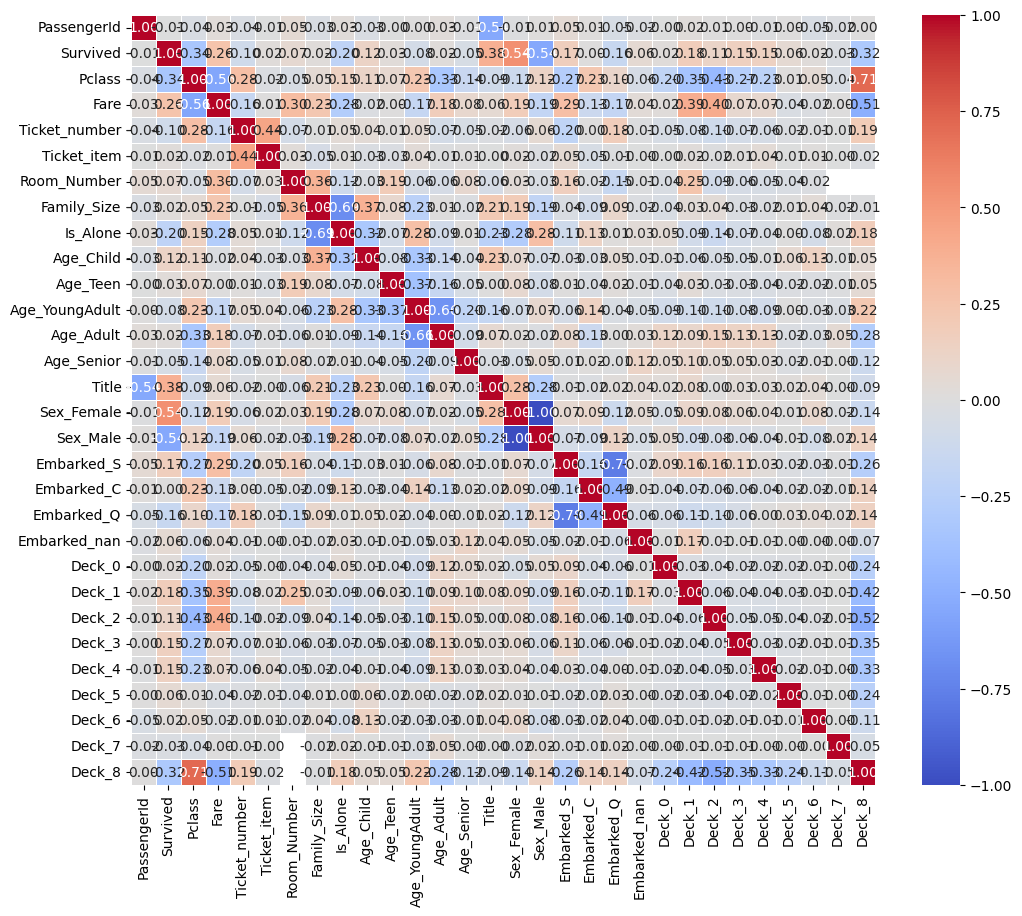

In [206]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [207]:
correlation_with_survived = data.corr()['Survived'].abs().sort_values(ascending=False)
threshold = 0.3
low_correlation_features = correlation_with_survived[correlation_with_survived < threshold].index
data.drop(low_correlation_features, axis=1, inplace=True)

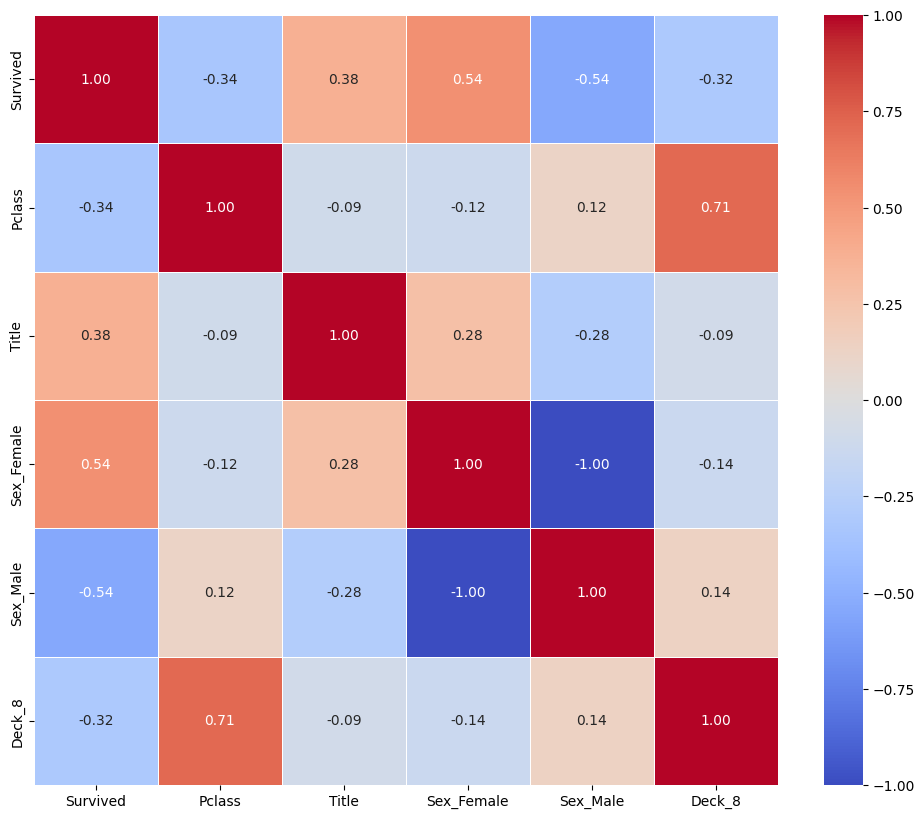

<bound method DataFrame.info of       Survived  Pclass  Title  Sex_Female  Sex_Male  Deck_8
0          0.0       3      1         0.0       1.0     1.0
1          1.0       1      3         1.0       0.0     0.0
2          1.0       3      2         1.0       0.0     1.0
3          1.0       1      3         1.0       0.0     0.0
4          0.0       3      1         0.0       1.0     1.0
...        ...     ...    ...         ...       ...     ...
1304       NaN       3      0         0.0       1.0     1.0
1305       NaN       1      0         1.0       0.0     0.0
1306       NaN       3      0         0.0       1.0     1.0
1307       NaN       3      0         0.0       1.0     1.0
1308       NaN       3      0         0.0       1.0     1.0

[1309 rows x 6 columns]>

In [208]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [209]:
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]



In [210]:
X = train_data.drop('Survived', axis = 1)
X_predict= test_data.drop('Survived', axis = 1)

y = train_data['Survived']
"""
outliers_mask = np.abs((X['Fare'] - X['Fare'].mean()) / X['Fare'].std()) > 3
print("Before replacement:")
print(X['Fare'].values[outliers_mask])
X_no_outliers = X.copy()
X_no_outliers.loc[outliers_mask, 'Fare'] = X['Fare'].mean()
print("After replacement:")
print(X_no_outliers['Fare'].values[outliers_mask])
"""

'\noutliers_mask = np.abs((X[\'Fare\'] - X[\'Fare\'].mean()) / X[\'Fare\'].std()) > 3\nprint("Before replacement:")\nprint(X[\'Fare\'].values[outliers_mask])\nX_no_outliers = X.copy()\nX_no_outliers.loc[outliers_mask, \'Fare\'] = X[\'Fare\'].mean()\nprint("After replacement:")\nprint(X_no_outliers[\'Fare\'].values[outliers_mask])\n'

In [220]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_predict_scaled = scaler.transform(X_predict)

model = RFC(n_estimators = 500, max_depth = 3, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy for the model on the test data is equal to :", accuracy)
y_pred = model.predict(X_predict_scaled)

Accuracy for the model on the test data is equal to : 0.7932960893854749


In [221]:
submission = pd.DataFrame()
submission['PassengerId'] = test_data_loading['PassengerId']
submission['Survived'] = y_pred
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('submission.csv', index = False)